El término Computer Vision (Visión Artificial en español) es un subcampo de machine learning que enseña a los ordenadores a ‘ver’ y entender el contenido de las imágenes digitales.

Puede parecer una tarea muy simple sin embargo, a nivel biológico y computacional las cosas se complican bastante.

**¿Por qué Computer Vision?**

Todo lo que nos rodea genera contenido digital. Desde los pequeños sensores instalados en las puertas de los supermercados hasta los más sofisticados smartphones y, muchos de esos dispositivos toman imágenes y graban videos.

Cabe esperar que, analizar dicho contenido digital puede proporcionar mucha información útil tanto en el sector comercial como académico. Una forma de hacerlo es que dicho análisis lo lleven a cabo los humanos, lo cual supone una inversión elevada. Sin embargo, existe una alternativa inteligente que consiste en sacarle partido al machine learning (ML) y deep learning (DL).

**Automoción**

Todos los modelos Tesla llevan instaladas decenas de cámaras. Utilizando la visibilidad 360, su sistema AutoPilot tiene la capacidad de conducir el vehículo sin la supervisión humana.

**Salud**

Microsoft pone a disposición un software llamado InnerEye, que es capaz de visualizar e indentificar tumores u otras anomalías en las radiografías (rayos X). Los radiólogos pueden subir una radiografía tridimensional, y el software colorea las zonas que presentan anomalías, con el fin de prestar mayor atención a dicha zona.

In [1]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('Imágenes descargadas')

Imágenes descargadas


### Cargar las librerías

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read an image


Use the function cv2.imread() to read an image. 

The image should be in the working directory or a full path of image should be given.

Second argument is a flag which specifies the way image should be read.
- cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
- cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
- cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel



In [3]:
#ima = cv2.imread('./Datasets/1/bac.jpg')

ima = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/bac.jpg")


#Leer imagen en escala de grises
#ima=cv2.imread('./Imagenes/bac.jpg',0)

row, col, chn = ima.shape
print('Filas    ', row)
print('Columnas ', col)
print('Canales  ', chn)

Filas     460
Columnas  860
Canales   3


### Mostrar imagen
Existen diferentes formas de mostrar una imagen, la primera de ellas es utilizando las librerías de matplotlib la cual está contenida en el espacio de color RGB, y la segunda de ellas es con las librerías de Opencv, contenidas en el espacio BGR.

Advertencia: Como la imagen se lee con las librerías de opencv estas se leen por defecto en el espacio BGR.

In [12]:
#Mostrar imagen con matplotlib
#cambio de espacio de color
imap=cv2.cvtColor(ima,cv2.COLOR_BGR2RGB)

#grafica por defecto
plt.subplot(2,1,1)
plt.imshow(ima, interpolation = 'bicubic')
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.imshow(imap, interpolation = 'bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

# Display an image
# Use the function cv2.imshow() to display an image in a window. 
# The window automatically fits to the image size. 
# First argument is a window name which is a string. second argument is our image. 
# You can create as many windows as you wish, but with different window names.

#from google.colab.patches import cv2_imshow         # This is for google colab
#cv2_imshow(ima)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


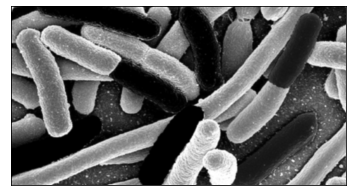

In [27]:
# RED
imap=cv2.cvtColor(ima,cv2.COLOR_BGR2RGB)
plt.imshow(imap[:,:,0], cmap='gray', interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

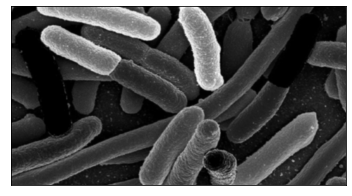

In [28]:
# Green
plt.imshow(imap[:,:,1], cmap='gray', interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

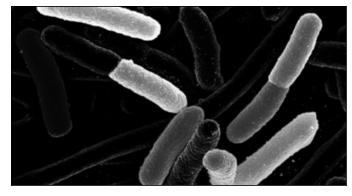

In [29]:
# Blue
plt.imshow(imap[:,:,2], cmap='gray', interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

Mostrar Imagen desde ventanas de opencv

In [12]:
cv2.imshow('image',ima) # genera una ventana adicional que 
cv2.waitKey(0)          # mostrara la imagen hasta que 
cv2.destroyAllWindows() # presione 0

### Mostrar con OpenCV
Debido a la forma como está diseñado Jupyter, este no permite desplegar ventanas externas, por lo tanto, las siguiente líneas de código no funcionan en este entorno, sin embargo, si es posible utilizarlas en spyder.

In [14]:
#Mostrar con Opencv
cv2.namedWindow('Ventana', 0)   #Crear ventana
cv2.imshow('Ventana',ima)       #Mostrar la imagen en la ventana creada
cv2.waitKey(0)                  #Dejar la ventana abierta hasta el siguiente enter, se puede indicar en mS cuando esperar
cv2.destroyAllWindows()         #Destruir todas las ventanas después de utilizarlas

### Guardar imagen

Use the function cv2.imwrite() to save an image.

First argument is the file name, second argument is the image you want to save.

In [16]:
cv2.imwrite('ImagenGuardada_desde_opencv.jpg', ima)

True

### Capturar Video desde Google Colab

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

To capture a video, you need to create a **VideoCapture** object. 

Its argument can be either the device index or the name of a video file. 

Device index is just the number to specify which camera

**cap.read()** returns a bool (True/False). If frame is read correctly, it will be True. So you can check end of the video by checking this return value.

You can also access some of the features of this video using **cap.get(propId)** method where propId is a number from 0 to 18. 

Each number denotes a property of the video (if it is applicable to that video) and full details can be seen here: Property Identifier.

Some of these values can be modified using **cap.set(propId, value)**. Value is the new value you want.

For example, You can check the frame width and height by cap.get(3) and cap.get(4). It gives me 640x480 by default.

But if you want to modify it to 320x240.Just use **ret = cap.set(3,320)** and **ret = cap.set(4,240)**.

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
  # Capture frame-by-frame 
  ret, frame = cap.read()
  
  # Our operations on the frame come here
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # Display the resulting frame
  cv2.imshow('frame',gray)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()